# Lab I - Dimensionality Reduction - Machine Learning II
# Workshop I
Estudiante: Mafredy Acevedo

## Punto 1

In [1]:
#Importing needed libraries:

#Data structures:
import numpy as np
import pandas as pd

In [23]:
#Simulate any random rectangular matrix A.

#Definition of the matrix A dimensions (nxm)
n=np.random.randint(1,10)
m=np.random.randint(1,10)
#Definition of the matrix A using random numbers trough numpy.random:
A=np.random.randint(-10, 10, size=[n,m])

#Outputs:
print(f"matrix A dimention is {n}x{m}")
print('The defined matrix A is:')
display(pd.DataFrame(A))

matrix A dimention is 8x8
The defined matrix A is:


,0,1,2,3,4,5,6,7
0,-9,-1,0,-2,-6,3,2,-9
1,-10,-9,-6,-3,2,-1,-5,7
2,7,3,-7,4,-6,1,0,-9
3,-8,0,-4,6,9,-10,8,9
4,-4,-3,-4,-2,-1,-9,-6,7
5,2,-9,4,-9,7,-6,8,-8
6,4,-6,4,7,-4,5,9,-6
7,3,-6,3,3,-3,0,2,6


In [24]:

# What is the rank and trace of A?

#Calculating the rank of A using numpy linear algebra functions (linalg module)
A_rank=np.linalg.matrix_rank(A)
#Calculating the trace of A by converting the numpy array into a matrix and using the trace method:
A_trace=np.matrix.trace(A)

#Outputs:
if n!=m:
    print(f"Matrix A rank is {A_rank}, which is coherent since it is the lower dimention of the matrix ({n}x{m})")
else:
    print(f"Squared matrix A rank is {A_rank}, which is coherent since it is equal to either of the dimensions ({n}x{m})")
    
print(f"On the other hand, Matrix A trace is {A_trace}, which is correct because it is equal to the sum of the diagonal of the Matrix")



Matrix A rank is 8, which is coherent since it is the lower dimention of the matrix (8x8)
On the other hand, Matrix A trace is -11, which is correct because it is equal to the sum of the diagonal of the Matrix


In [25]:
#What is determinant of A?

#Calculating the determinant of A using numpy linear algebra functions (linalg module)
if n==m:
    A_det=np.linalg.det(A)
    print(f'The determinant of the Matrix A is {A_det}')
else:
    print('Non-squared matrices do not have determinant')

The determinant of the Matrix A is -232925641.99999985


In [30]:
#Can you invert A? How?
if n==m:
    if A_det!=0:
        #Calculating the inverse of A using numpy linear algebra functions (linalg module)
        A_inv=np.linalg.inv(A)
        print('A can be inverted since its determinant is different than 0. We can use the numpy linear algebra functions to calculate inverse matrix')
        print('Inverse A is:')
        display(pd.DataFrame(A_inv))
        print('We can see if the inverse is correct by multiplyng A and A_inv and checking that the result is equal to the Identity I:')
        display(pd.DataFrame(A@A_inv).round(2))
    else:
        print('Matrix A is not invertible because its determinant is equal to 0')
else:
    print('Matrix A is not invertible because it is a non-squared matrix')    


A can be inverted since its determinant is different than 0. We can use the numpy linear algebra functions to calculate inverse matrix
Inverse A is:


,0,1,2,3,4,5,6,7
0,-0.038565,-0.006494,0.044681,-0.010813,-0.029487,0.020919,-0.036695,0.058568
1,0.039883,-0.048855,0.017633,0.027134,-0.055205,-0.012598,-0.097447,0.052733
2,-0.028396,-0.061372,-0.121804,-0.041154,0.115163,-0.019793,0.130356,-0.122359
3,-0.088000,-0.006007,-0.071051,-0.014854,0.149089,-0.059635,0.232899,-0.229839
4,-0.100627,0.033351,-0.058121,-0.009312,0.031248,-0.002103,0.113769,-0.188554
5,0.008338,0.055997,0.018245,-0.005506,-0.131482,-0.010788,-0.058078,0.063738
6,0.098295,-0.008878,0.087628,0.072751,-0.170631,0.043319,-0.187928,0.249014
7,0.034285,0.007716,0.033451,0.031638,-0.100087,0.001165,-0.141200,0.188933


We can see if the inverse is correct by multiplyng A and A_inv and checking that the result is equal to the Identity I:


,0,1,2,3,4,5,6,7
0,1.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.0
3,0.0,-0.0,0.0,1.0,0.0,0.0,-0.0,0.0
4,-0.0,0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,-0.0,0.0,-0.0,0.0,0.0,0.0,1.0,-0.0
7,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,1.0


In [60]:
#How are eigenvalues and eigenvectors of A’A and AA’ related? What interesting differences can you notice between both?

#First, we obtain A transposed:

A_T=np.matrix.transpose(A)

A_TxA=A_T@A #Calculating A’A
AxA_T=A@A_T #Calculating AA’

A_TxA_eigenvalues, A_TxA_eigenvectors =np.linalg.eig(A_TxA) #Using np.linalg functions to obtain both eigenvalues and eigenvector of A’A 
AxA_T_eigenvalues, AxA_T_eigenvectors =np.linalg.eig(AxA_T) #Using np.linalg functions to obtain both eigenvalues and eigenvector of AA’

#Comparing the eigenvalues of both matrices:
print('Eigen values are:')
display(pd.DataFrame([A_TxA_eigenvalues,AxA_T_eigenvalues],index=['A’A','AA’']).T)
print('Most important thing that can be concluded is that both eigenvalues are the same for A’A and AA’\n')

#Comparing the eigenvectors of both matrices:
print('A’A eigen vectors are:')
display(pd.DataFrame(A_TxA_eigenvectors))
print('AA’ eigen vectors are:')
display(pd.DataFrame(AxA_T_eigenvectors))
print('Most important thing that can be concluded is that ....')

Eigen values are:


,A’A,AA’
0,844.013961,844.013961
1,457.286471,457.286471
2,313.864540,313.864540
3,1.969548,1.969548
4,42.426438,42.426438
5,127.214561,127.214561
6,217.619647,217.619647
7,193.604834,193.604834


Most important thing that can be concluded is that both eigenvalues are the same for A’A and AA’

A’A eigen vectors are:


,0,1,2,3,4,5,6,7
0,0.453963,0.027815,-0.395055,-0.100983,0.130319,-0.403046,-0.565916,-0.356633
1,0.135461,0.474922,-0.253980,-0.173625,-0.190392,0.418083,-0.358750,0.567189
2,0.192882,-0.274184,-0.077440,0.335407,-0.495296,0.576663,-0.125235,-0.419025
3,0.077044,0.182473,-0.656447,0.531108,0.042707,-0.124463,0.469433,0.100439
4,-0.334811,-0.376021,-0.153936,0.325758,0.593919,0.270537,-0.401698,0.171475
5,0.417259,0.244814,0.088274,-0.185446,0.585962,0.462904,0.298436,-0.277640
6,0.156950,-0.630514,-0.398372,-0.541624,-0.049839,0.086245,0.253952,0.226601
7,-0.649301,0.257541,-0.390279,-0.362241,-0.032418,0.140786,0.008293,-0.455636


AA’ eigen vectors are:


,0,1,2,3,4,5,6,7
0,0.173587,0.078494,0.509509,0.223531,0.411669,-0.188773,0.559377,-0.368960
1,-0.466886,-0.023557,0.425267,0.017042,-0.595395,0.193851,0.401133,0.217576
2,0.372160,-0.208178,-0.061335,0.235855,-0.198534,0.756185,0.023773,-0.383371
3,-0.540927,0.308148,-0.532627,0.109730,0.001527,0.005872,0.227190,-0.514839
4,-0.414953,-0.138154,0.168352,-0.412049,0.591044,0.502567,-0.057477,0.073420
5,0.047146,0.849370,0.306049,0.085335,-0.017029,0.218283,-0.356980,0.005316
6,0.380278,0.329655,-0.290569,-0.545656,-0.043215,0.134889,0.542892,0.223051
7,-0.041945,0.076175,-0.256237,0.638177,0.291762,0.191103,0.220317,0.591039


## Punto 2

In [2]:
#Importing needed libraries:

#Images management:
from PIL import Image 
import matplotlib.pyplot as plt
#System comunication
import os
#To calculate the euclidean distance
from scipy.spatial.distance import euclidean

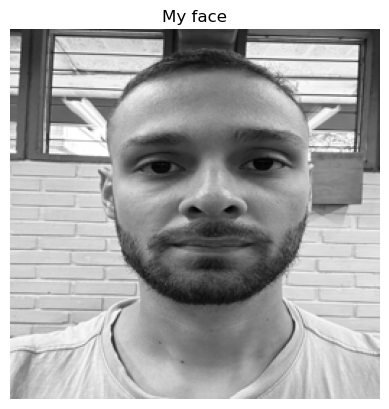

In [4]:
#Add a steady, well-centered picture of your face to a shared folder alongside your classmates.
#- Edit your picture to be 256x256 pixels, grayscale (single channel)

# Loading my picture
MAH = Image.open('Foto_MAH.jpg')

# Converting to grayscale
MAH_gray = MAH.convert('L')

# Resizing to 256x256 pixels
MAH_resized = MAH_gray.resize((256, 256))

#- Plot your edited face
plt.imshow(MAH_resized, cmap='gray')
plt.axis('off')
plt.title('My face')
plt.show()

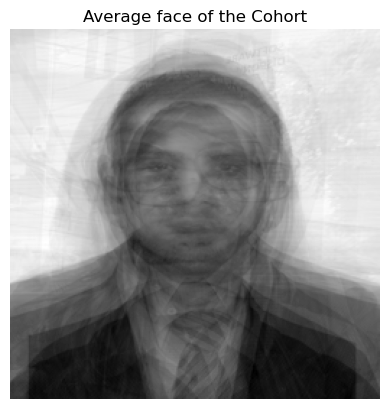

In [5]:
#- Calculate and plot the average face of the cohort.

#Loading and converting classmates faces of the cohort into NumPy arrays

#Path where the pictures of the other classmates are stored
cohort_pictures_path = os.getcwd()+'\CohortPictures'

#Storing each picture name inside a list
cohort_pictures = os.listdir(cohort_pictures_path)

#Loading, converting, resizing and stoting each picture inside another list, by iterating the previous list
cohort_pictures_as_array = [np.array(Image.open(os.path.join(cohort_pictures_path, picture)).convert('L').resize((256, 256))) for picture in cohort_pictures]

average_face = np.mean(cohort_pictures_as_array, axis=0)

plt.imshow(average_face, cmap='gray')
plt.axis('off')
plt.title('Average face of the Cohort')
plt.show()

This average face is not a good subject for the experiment, considering that most of the pictures were taken\nin different angles and distances from the cameras, and the background varies a lot.

In [6]:
#- How distant is your face from the average? How would you measure it?

# Calculate Euclidean distance
MAH_as_array=np.array(MAH_resized)
distance = euclidean(MAH_as_array.flatten(), average_face.flatten())

print(f"The Euclidean distance between my face and the average face is {distance:.2f}")
print(f"Considering the plotted 'Avegage face of the cohort', it was very clear that any face compared to it would be very far.")

The Euclidean distance between my face and the average face is 19778.47
Considering the plotted 'Avegage face of the cohort', it was very clear that any face compared to it would be very far.


## Punto 3

In [71]:
#Importing needed libraries:

#Dimentional reduction:
from unsupervised import PCA as myPCA
from unsupervised import SVD as mySVD
from unsupervised import tSNE as mytSNE

## Punto 4

Apply SVD over the picture of your face, progressively increasing the number of singular values used. Is
there any point where you can say the image is appropriately reproduced? How would you quantify how
different your photo and the approximation are?

In [7]:
# Calculating the SVD
u, s, v = np.linalg.svd(MAH_as_array, full_matrices=False)

variance Explained by Top 5 singular values:
[0.3823 0.0593 0.0486 0.0341 0.0275]
The needed number of components to obtain a cumulative explained variance of at least 80% is 32


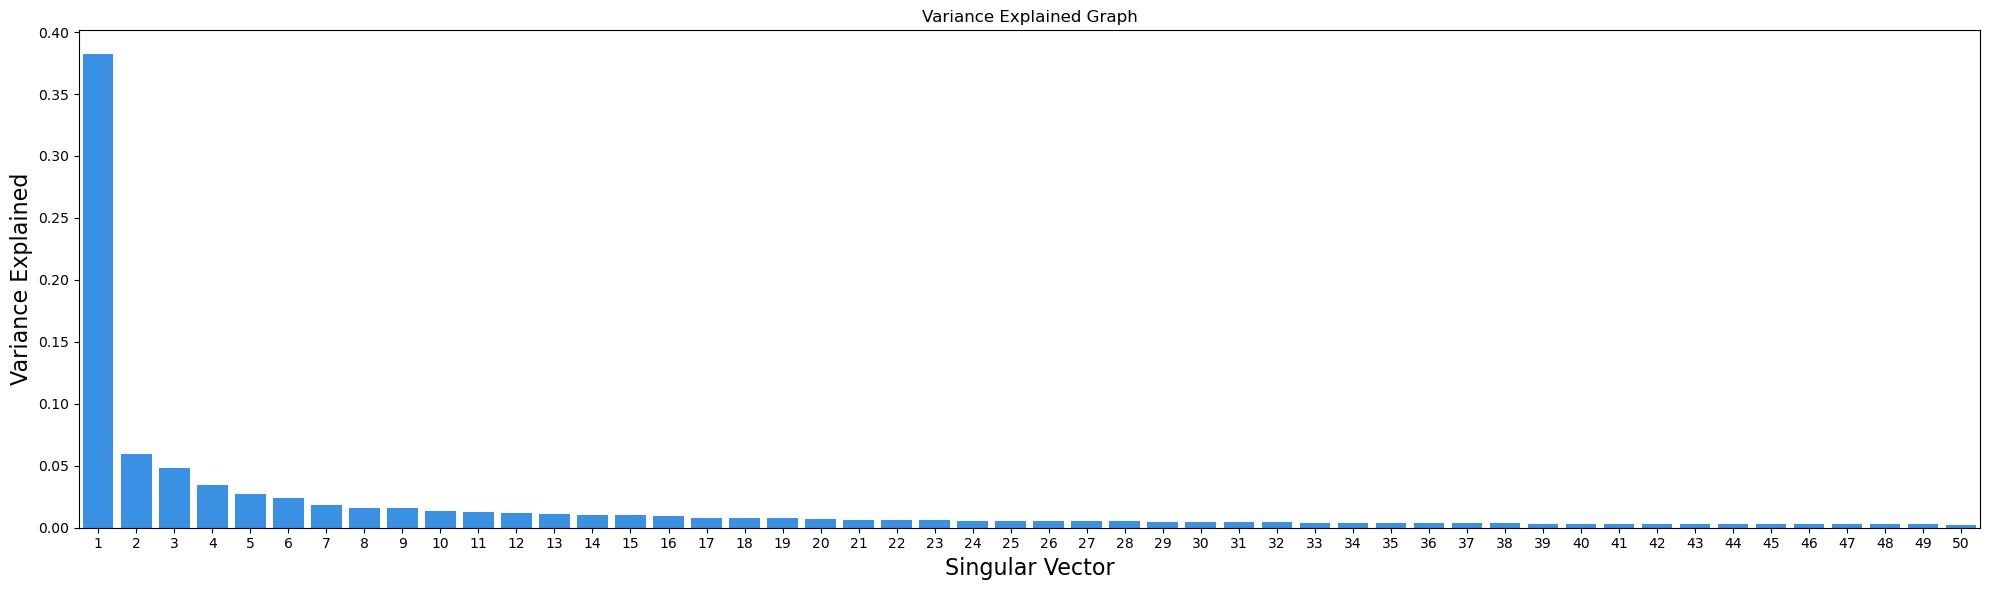

In [8]:
import seaborn as sns
  
var_explained = np.round(s/np.sum(s), decimals=4)
  
# Variance explained top Singular vectors
print(f'variance Explained by Top 5 singular values:\n{var_explained[0:5]}')
ev=0
i=0
while(ev<0.8):
    ev+=var_explained[i]
    i+=1

print(f'The needed number of components to obtain a cumulative explained variance of at least 80% is {i}')

plt.figure(figsize=(20, 6))  
sns.barplot(x=list(range(1, 51)),
            y=var_explained[0:50], color="dodgerblue")
  
plt.title('Variance Explained Graph')
plt.xlabel('Singular Vector', fontsize=16)
plt.ylabel('Variance Explained', fontsize=16)
plt.tight_layout()
plt.show()

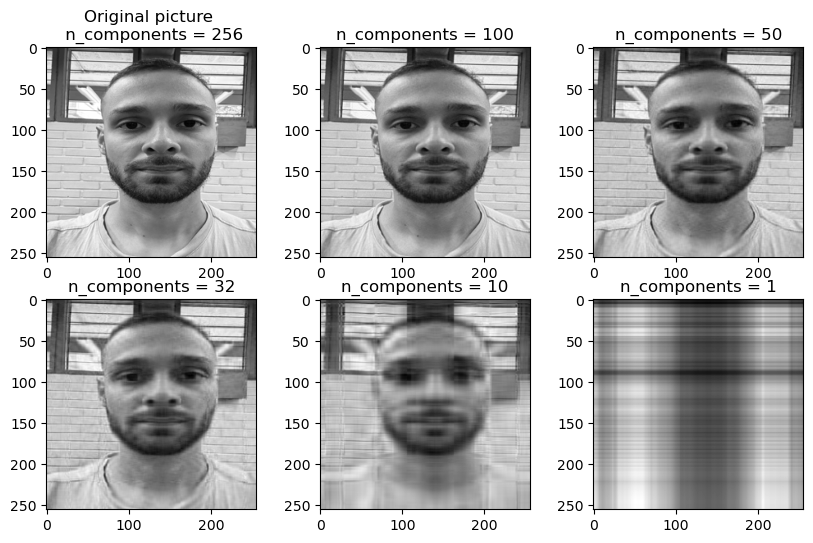

In [9]:
# plot images with different number of components
comps = [256, 100, 50, 32, 10, 1]
plt.figure(figsize=(10, 6))
  
for i in range(len(comps)):
    low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ v[:comps[i], :]
      
    if(i == 0):
        plt.subplot(2, 3, i+1),
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'Original picture \n n_components = {comps[i]}')
      
    else:
        plt.subplot(2, 3, i+1),
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'n_components = {comps[i]}')

To answer the questions of this point: It can be stated that recognizing an individual becomes possible using only 10 singular values, as this number is sufficient to distinguish their facial features. However, with 26 singular values, the individual becomes easily recognizable. To measure the difference between each compressed image and the original picture, we can use the concept of cumulative explained variance. This metric indicates, in terms of a percentage, how closely the approximations represent the original image.

## Punto 5

Train a naive logistic regression on raw MNIST images to distinguish between 0s and 8s. We are calling
this our baseline. What can you tell about the baseline performance?

In [10]:
#Loading the needed librarys
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [11]:
mnist = load_digits() #loading the Bunch container 
real_number = pd.DataFrame(mnist.target) #Saving the real numbers as a pandas DataFrame (target)
pixels = pd.DataFrame(mnist.data) #Saving the pixels that represents the real numbers as a pandas DataFrame (data)

At this point, either the target and the data contain numbers from 0 to 8. Since the objetive of this point is to predict if it is 0 or 8, let's drop the data corresponding to the numbers form 1 to 7:

In [12]:
real_number = real_number[real_number[0].isin([0,8])]
print(f'Now the target has only the following numbers: {real_number[0].unique()}')

Now the target has only the following numbers: [0 8]


Now let's drop the rows of the input data that doesn't correspond to 0s or 8s

In [13]:
pixels = pixels.iloc[real_number.index]

In [14]:
real_number.reset_index(inplace=True,drop=True)
real_number.columns=['num']
pixels.reset_index(inplace=True,drop=True)

Next step is to split the input data and train the naive logistic regression

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
                                        pixels,
                                        real_number.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
LR1 = LogisticRegression()
LR1.fit(X_train, y_train)
y_pred = LR1.predict(X_test)

c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using the accuracy score it's possible to messure the predictions of our model

In [16]:
print(f'The accuracy of the model is of {accuracy_score(y_test, y_pred)*100}%')

The accuracy of the model is of 100.0%


The first impression is that maybe the model can be overfitted, considering that each prediction was exact. So, let's use a crossfold validation to check the model with different folds:

In [17]:
scorer = make_scorer(accuracy_score, greater_is_better=True)
score=abs(np.mean(cross_val_score(LR1, pixels, real_number.values.reshape(-1,1), cv=5, n_jobs=-1, scoring=scorer)))
print(f'After testing the model using 5 different folds of train/test data, the accuracy of the model is of {score*100}%')

After testing the model using 5 different folds of train/test data, the accuracy of the model is of 100.0%


The last result shows that the model is not overfitted and the input data discribes really well the output data.

## Punto 6 + Punto 7

6)
Now, apply dimensionality reduction using all your algorithms to train the model with only 2 features per
image.
- Plot the 2 new features generated by your algorithm
- Does this somehow impact the performance of your model?

7)
Repeat the process above but now using the built-in algorithms in the Scikit-Learn library. How different
are these results from those of your implementation? Why?

In [18]:
from sklearn.decomposition import PCA 
from sklearn.decomposition import TruncatedSVD as SVD

* Applying PCA with 2 features for both sklearn and my algorithms

In [26]:
#First, using my PCA
newPCA=myPCA.PCA(2)
newPCA.fit(np.array(pixels))
pixels_PCA=newPCA.transform(np.array(pixels))
pixels_PCA_DF=pd.DataFrame(pixels_PCA, columns=['C1','C2'])


In [27]:
#Next, using scikit-learn PCA
sklPCA=PCA(2)
sklPCA.fit(pixels)
pixels_PCA_skl=sklPCA.transform(pixels)
pixels_PCA_skl_DF=pd.DataFrame(pixels_PCA_skl, columns=['C1','C2'])

Scatter Plot - Sklearn PCA


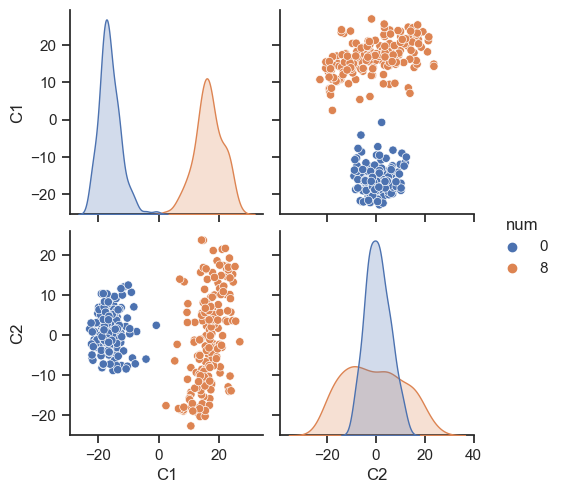

Scatter Plot - my PCA


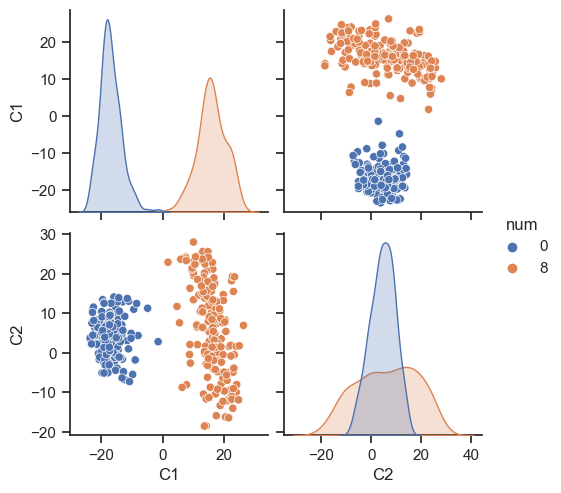

In [55]:
mnist_PCAskl = pd.concat([pixels_PCA_skl_DF, real_number], axis = 1)
mnist_myPCA = pd.concat([pixels_PCA_DF, real_number], axis = 1)

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, palette="pastel")


sns.pairplot(mnist_PCAskl, hue = 'num', hue_order = [0,8],palette='deep')
print('Scatter Plot - Sklearn PCA')
plt.show()
sns.pairplot(mnist_myPCA, hue = 'num', hue_order = [0,8],palette='deep')
print('Scatter Plot - my PCA')
plt.show()

Both PCA algorithms perfectly separates the two possible targets with two principal components. The results are pretty similar

Now, we check de Logistic Regression using the new input data created by my PCA

In [85]:
X_train_myPCA, X_test_myPCA, y_train_myPCA, y_test_myPCA = train_test_split(
                                        pixels_PCA_DF,
                                        real_number.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
LR_myPCA = LogisticRegression()
LR_myPCA.fit(X_train_myPCA, y_train_myPCA)
y_pred_myPCA = LR_myPCA.predict(X_test_myPCA)

c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
print(f'The accuracy of the model using my PCA input data is of {accuracy_score(y_test_myPCA, y_pred_myPCA)*100}%')

The accuracy of the model using my PCA input data is of 100.0%


Checking sklearn PCA features with LR

In [91]:
X_train_PCAskl, X_test_PCAskl, y_train_PCAskl, y_test_PCAskl = train_test_split(
                                        pixels_PCA_skl_DF,
                                        real_number.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
LR_sklPCA = LogisticRegression()
LR_sklPCA.fit(X_train_PCAskl, y_train_PCAskl)
y_pred_sklPCA = LR_sklPCA.predict(X_test_PCAskl)

c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [99]:
print(f'The accuracy of the model using PCA sklearn input data is of {accuracy_score(y_test_PCAskl, y_pred_sklPCA)*100}%')

The accuracy of the model using PCA sklearn input data is of 100.0%


In conclusion, both PCA algorithms, at least for the dataset tested works well. Maybe with a dataset with more atypical data and outliers, and with inputs not highly correlated with the output, the results obtained with myPCA will be less accurate than those calculated using sklearn PCA

* Applying SVD with 2 features for both sklearn and my algorithms

In [56]:
#First, using my SVD
newSVD=mySVD.SVD()
pixel_as_array=np.array(pixels)
U,s,VT=newSVD.fit_transform(pixel_as_array)

In [57]:
print(U.shape)
print(s.shape)
print(VT.shape)

(352, 352)
(352, 64)
(64, 64)


In [58]:
#Next, using sklearn SVD
sklSVD=SVD(2)
U1=sklSVD.fit_transform(pixels)
s1=np.diag(sklSVD.singular_values_)
VT1=sklSVD.components_

In [59]:
real_number.reset_index(inplace=True,drop=True)
real_number.columns=['num']

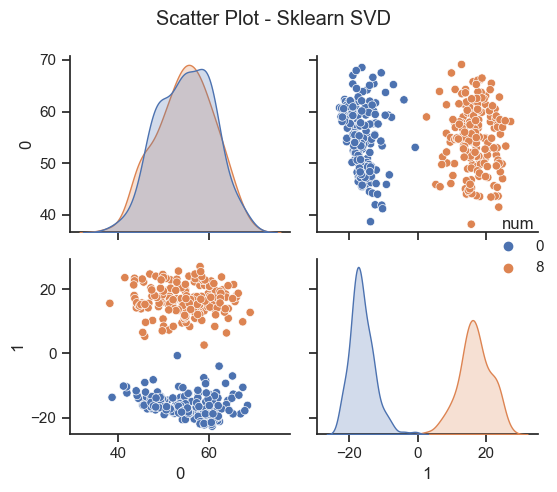

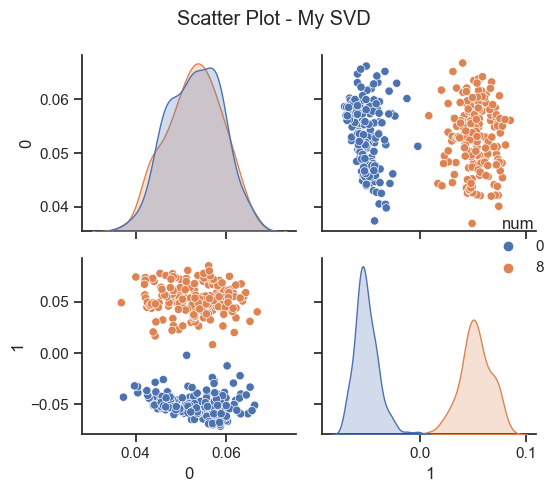

In [69]:
mnist_SVDskl = pd.concat([pd.DataFrame(U1), real_number], axis = 1)
mnist_mySVD = pd.concat([pd.DataFrame(U[:,:2]), real_number], axis = 1)

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns1=sns.pairplot(mnist_SVDskl, hue = 'num', hue_order = [0,8],palette='deep')
plt.suptitle('Scatter Plot - Sklearn SVD')
plt.tight_layout(rect=[0, 0, 1, 1])

plt.show()

sns.pairplot(mnist_mySVD, hue = 'num', hue_order = [0,8],palette='deep')
plt.suptitle('Scatter Plot - My SVD')
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

Both SVD methods seems to obtain very similar results, demonstraiting a really good performance from the SVD build from scratched. The only noticeable difference is the scale of the values founded for the components.
The 2 algorithms also separates really well the 2 possible outputs with just 2 components.

Now, we check de Logistic Regression using the new input data created by my SVD

In [98]:
X_train_mySVD, X_test_mySVD, y_train_mySVD, y_test_mySVD = train_test_split(
                                        pd.DataFrame(U[:,:2]),
                                        real_number.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
LR_mySVD = LogisticRegression()
LR_mySVD.fit(X_train_mySVD, y_train_mySVD)
y_pred_mySVD = LR_mySVD.predict(X_test_mySVD)

c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
print(f'The accuracy of the model using my SVD input data is of {accuracy_score(y_test_mySVD, y_pred_mySVD)*100}%')

The accuracy of the model using my SVD input data is of 100.0%


Checking sklearn SVD features with LR

In [101]:
X_train_sklSVD, X_test_sklSVD, y_train_sklSVD, y_test_sklSVD = train_test_split(
                                        pd.DataFrame(U1),
                                        real_number.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
LR_sklSVD = LogisticRegression()
LR_sklSVD.fit(X_train_sklSVD, y_train_sklSVD)
y_pred_sklSVD = LR_sklSVD.predict(X_test_sklSVD)

c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [102]:
print(f'The accuracy of the model using sklearn SVD input data is of {accuracy_score(y_test_sklSVD, y_pred_sklSVD)*100}%')

The accuracy of the model using sklearn SVD input data is of 100.0%


Same conclusions obtained with PCAs methods used.

* Applying tSNE with 2 features for both sklearn and my algorithms

In [76]:
#First, using my tsNE
#newtSNE=mytSNE.TSNE(2)
#pixel_tSNE=newtSNE.fit_transform(pixel_as_array)
#pixels_tSNE_DF=pd.DataFrame(pixel_tSNE, columns=['C1','C2'])

AttributeError: 'TSNE' object has no attribute '_setup_input'

Didn't get to create a usefull tSNE

Implementing sklearn tSNE:

In [103]:
from sklearn.manifold import TSNE as TSNE_scklearn

In [104]:
sklTSNE=TSNE_scklearn(2)
pixels_tSNE=sklTSNE.fit_transform(np.array(pixels))
pixels_tSNE_DF=pd.DataFrame(pixels_tSNE, columns=['C1','C2'])

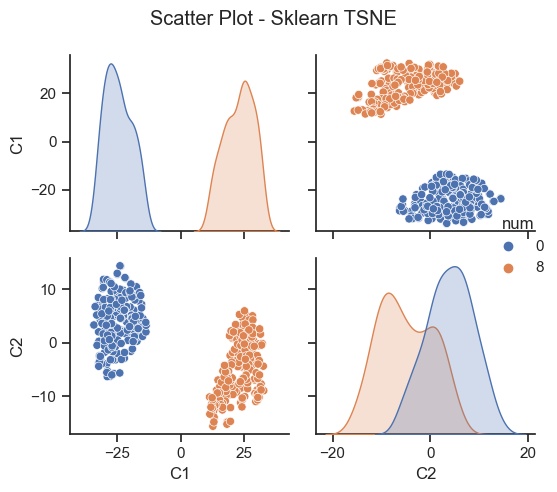

In [105]:
mnist_TSNEskl = pd.concat([pixels_tSNE_DF, real_number], axis = 1)

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns1=sns.pairplot(mnist_TSNEskl, hue = 'num', hue_order = [0,8],palette='deep')
plt.suptitle('Scatter Plot - Sklearn TSNE')
plt.tight_layout(rect=[0, 0, 1, 1])

plt.show()

The separabilty and compactness of the new features generated by tSNE is noticeable better than those obtained with PCA and SVD

Less check this new data with LR

In [106]:
X_train_sklTSNE, X_test_sklTSNE, y_train_sklTSNE, y_test_sklTSNE = train_test_split(
                                        pd.DataFrame(pixels_tSNE),
                                        real_number.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
LR_sklTSNE = LogisticRegression()
LR_sklTSNE.fit(X_train_sklTSNE, y_train_sklTSNE)
y_pred_sklTSNE = LR_sklTSNE.predict(X_test_sklTSNE)


c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [107]:
print(f'The accuracy of the model using sklearn TSNE input data is of {accuracy_score(y_test_sklTSNE, y_pred_sklTSNE)*100}%')

The accuracy of the model using sklearn TSNE input data is of 100.0%


## Punto 8

What strategies do you know (or can think of) in order to make PCA more robust? (Bonus points for
implementing them)

* Standardize or Normalize Data: Before applying PCA, standardize or normalize the data to ensure that all variables have the same scale. This prevents variables with larger ranges from dominating the principal components.

* Handle Outliers: Outliers can have a significant impact on PCA results. Consider using outlier detection and removal techniques before performing PCA to improve robustness.

For this implementation, we are going to standardize the data and compare the new transform data with the previous one

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pixels_scaled = scaler.fit_transform(pixel_as_array)

sklPCA_2=PCA(2)
sklPCA_2.fit(pixels_scaled)
MAH_scaled_PCA_skl=sklPCA_2.transform(pixels_scaled)

We use the explained variance of each model to compare the results:

In [56]:
explained_variances_non_scaled_data = sklPCA.explained_variance_ratio_
explained_variances_scaled_data = sklPCA_2.explained_variance_ratio_

print(f'The explained variance using PCA with the non-scaled data is: {round(sum(explained_variances_non_scaled_data)*100,2)}%')
print(f'The explained variance using PCA with the scaled data is: {round(sum(explained_variances_scaled_data)*100,2)}%')

The explained variance using PCA with the non-scaled data is: 43.91%
The explained variance using PCA with the scaled data is: 31.82%


For this particular case, the PCA model works better with the non-scaled data

## Punto 9

* What are the underlying mathematical principles behind UMAP? 

In its simplest sense, the UMAP algorithm consists of two steps: construction of a graph in high dimensions followed by an optimization step to find the most similar graph in lower dimensions. In order to achieve this goal, the algorithm relies on a number of insights from algebraic topology and Riemannian geometry. Despite the intimidating mathematics, the intuitions behind the core principles are actually quite simple: UMAP essentially constructs a weighted graph from the high dimensional data, with edge strength representing how “close” a given point is to another, then projects this graph down to a lower dimensionality. The advanced mathematics gives UMAP a solid footing with which to handle the challenges of doing this in high dimensions with real data.

* What is it useful for?

    - Data Visualization
    
        UMAP is primarily used for visualizing high-dimensional data in a lower-dimensional space (often 2D or 3D). It can reveal clusters, patterns, and relationships in the data that might not be apparent in the original high-dimensional space.
    - Dimensionality Reduction

        UMAP can reduce the dimensionality of data while preserving its structure. This can be valuable for speeding up machine learning algorithms, reducing noise, and simplifying data analysis.
    - Clustering and Classification

        UMAP can assist in clustering and classification tasks by providing a meaningful representation of the data in a lower-dimensional space, which can lead to improved model performance.

    - Feature Engineering
    
        UMAP can be used as a feature engineering technique by creating new features in a lower-dimensional space for subsequent machine learning tasks.

## Punto 10

Linear Discriminant Analysis (LDA) is a supervised learning algorithm used for classification tasks in machine learning. It is a technique used to find a linear combination of features that best separates the classes in a dataset.

* What are the underlying mathematical principles behind UMAP? 

    LDA works by projecting the data onto a lower-dimensional space that maximizes the separation between the classes. It does this by finding a set of linear discriminants that maximize the ratio of between-class variance to within-class variance. In other words, it finds the directions in the feature space that best separate the different classes of data.
    LDA assumes that the data has a Gaussian distribution and that the covariance matrices of the different classes are equal. It also assumes that the data is linearly separable, meaning that a linear decision boundary can accurately classify the different classes.

* What is it useful for?

    LDA is a powerful tool for understanding and organizing large text datasets, making it valuable in various applications where text analysis is required. It's important to note that while LDA is a foundational model for topic modeling, it has some limitations and assumptions, and there are more advanced topic models available that address some of these limitations.

    - Topic Modeling:

        LDA is primarily used for unsupervised topic modeling. It can identify topics in a collection of documents and assign words to those topics. This helps in understanding the main themes or subjects present in a large corpus of text data.

    - Document Classification:

        LDA can be adapted for document classification tasks. By treating topics as features, it can be used to classify documents into predefined categories or topics.
    